In [1]:
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Ark 6

In [86]:
# ARK 6 Version
def addNoiseToBenchmark(infilename, outfilename, mu, sigma):
    with open(infilename) as json_file:
        data = json.load(json_file)
        newjson = {}

        for i, item in enumerate(data):
            if i > 20:
                break
            accuracy = data[item]["val_acc"][0]
#             accuracy = accuracy + random.gauss(mu, sigma)
            newjson[item] = {}
            newjson[item]['val_acc'] = [1]
            newjson[item]['val_acc'][0] = accuracy

        with open(outfilename, 'w') as outfile:
            json.dump(newjson, outfile)
            
random.seed(1234)
mu = 0; sigma = 0.1
infilename = "../../Benchmarks/ark6/ark6.json"
# outfilename = "../../Benchmarks/ark6/ark6_noisy_mu=" + str(mu) + "_sigma=" + str(sigma) + ".json"
outfilename = "../../Benchmarks/ark6/ark6_minimal_subset.json"
addNoiseToBenchmark(infilename, outfilename, mu, sigma)

{'test_acc': 69.18, 'MMACs': 128.38, 'val_acc': 69.42, 'Params': 2590372}


TypeError: 'float' object is not subscriptable

In [93]:
def readBench(infilename):
    with open(infilename) as json_file:
        data = json.load(json_file)
        myDict = {}
        myList = [0] * len(data)
        for i, item in enumerate(data):
            accuracy = data[item]["val_acc"][0]
            myDict[item] = accuracy
            myList[i] = accuracy
        
        return myDict, myList
    
ark6Dict, ark6List = readBench("../../Benchmarks/ark6/ark6_minimal.json")
ark6DictNoisy, ark6ListNoisy = readBench("../../Benchmarks/ark6/ark6_noisy_mu=0_sigma=0.1.json")

# Ark 7

## Function for adding noise or getting a subset

In [36]:
# ARK 7 Version
def transformBenchmark(folder, infile, outfile, MO=True, sigma=0, subset=1):
    random.seed(1234)
    with open(folder + infile) as json_file:
        data = json.load(json_file)
        newjson = {}
        otherdatajson = {}

        for i, item in enumerate(data):
#             print(item)
            if subset < 1 and random.random() > subset:
                continue
            try:
                newjson[item] = {}
                
                # Read accuracy
                accuracy = data[item]["val_acc"]
                if sigma is not 0: # Add noise
                    accuracy = accuracy + random.gauss(0, sigma)   
                newjson[item]['val_acc'] = accuracy
                
                # Read MMACs
                if MO:
                    MMACs = data[item]["MMACs"]
                    newjson[item]['MMACs'] = MMACs\
                    
            except:
                otherdatajson[item] = data[item]
                print("could not load item ", item)
                    
        with open(folder + outfile, 'w') as outfile:
            json.dump(newjson, outfile)
            
        with open(folder + "other_data.json", 'w') as outfile:
            json.dump(otherdatajson, outfile)
            

In [15]:
infilename = "ark8_original.json"
folder = "../benchmarks/ark8/"

Add noise

In [148]:
sigma = 2
folder = "../../Benchmarks/ark7/"
outfilename = "ark7_MO_noisy_sigma=" + str(sigma) + ".json"
transformBenchmark(infilename, outfilename, sigma=sigma)

Get only subset

In [52]:
folder = "../../Benchmarks/ark7/
outfilename = "ark7_MO_subset_0.001.json"
transformBenchmark(folder, infilename, outfilename, subset=0.001)

Get stripped down version

In [37]:
infilename = "ark8_original.json"
folder = "../benchmarks/ark8/"

# outfilename = "ark8_MO.json"
# transformBenchmark(folder, infilename, outfilename, MO=True)

outfilename = "ark8.json"
transformBenchmark(folder, infilename, outfilename, MO=False)

could not load item  full


## Read benchmark (for plots)

In [22]:
def readBench(infilename, readMMACs=False):
    with open(infilename) as json_file:
        data = json.load(json_file)
        myDict = {}
        myList = [0] * len(data)
        myList2 = [0] * len(data)
        for i, item in enumerate(data):
            accuracy = data[item]["val_acc"] / 100
            mmacs = 0
            if readMMACs: mmacs = 1 - data[item]["MMACs"] / 500
            myList2[i] = mmacs
            myDict[item] = (accuracy, mmacs)
            myList[i] = accuracy
        
        return myDict, myList, myList2
    

In [109]:
ark7Dict, ark7List = readBench("../../Benchmarks/ark7/ark7.json")
ark7Noisy05Dict, ark7Noisy05List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=0.5.json")
ark7Noisy1Dict, ark7Noisy1List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=1.json")
ark7Noisy2Dict, ark7Noisy2List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=2.json")

# ark7DictNoisy, ark7ListNoisy = readBench("../../Benchmarks/ark7/ark7_noisy_mu=0_sigma=0.1.json")

## Plots

### Distribution of dataset

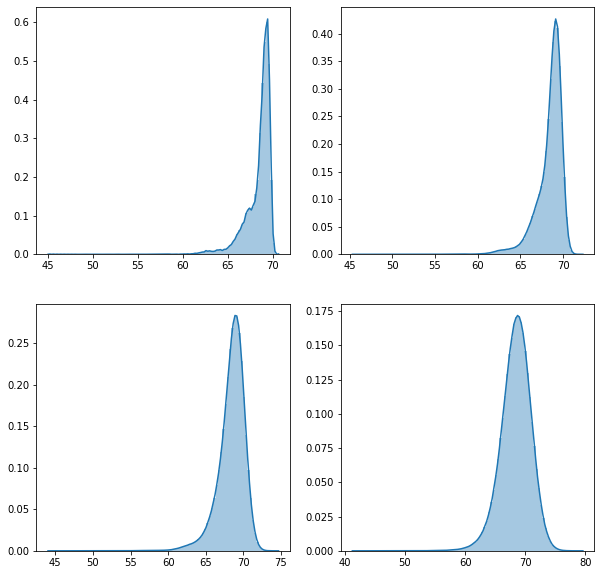

In [122]:
# plt.figure(figsize=(10,10))
fig, a = plt.subplots(2,2, figsize=(10,10))
sns.distplot(ark7List, bins=100, ax=a[0][0])
sns.distplot(ark7Noisy05List, bins=100, ax=a[0][1])
sns.distplot(ark7Noisy1List, bins=100, ax=a[1][0])
sns.distplot(ark7Noisy2List, bins=100, ax=a[1][1])
    


### Scatterplot of Accuracy vs MMACs

In [72]:
ark7MODict, ark7MOListValAcc, ark7MOListMMACs = readBench("../../Benchmarks/ark7/ark7_MO_subset_0.01.json", readMMACs=True)

In [51]:
ark7Dict, ark7ListValAcc, ark7ListMMACs = readBench("../../Benchmarks/ark7/ark7_MO.json", readMMACs=True)

In [189]:
# WRITING FRONT TO CSV FILE
# import csv
# with open('../../Benchmarks/ark7/front.csv', mode='w') as csv_file:
#     csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     for i in range(len(X_FRONT)):
#         csv_writer.writerow([X_FRONT[i], Y_FRONT[i]])

In [155]:
def ark7scatter (uniqueEvaluationsBudget):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    ax1.scatter(ark7MOListValAcc, ark7MOListMMACs, 0.2, color="lightgray")
    plt.xlabel("Validation accuracy")
    plt.ylabel("MMACs")
    plt.title("Scatterplot of solutions found by different optimizers on ARK-7. Budget = " + 
              str(uniqueEvaluationsBudget) + " unique evaluations")

    X_FRONT = []
    Y_FRONT = []
    with open("../../Benchmarks/ark7/paretofront_200211_110959_1581415799755.json") as json_file:
         paretofront = data["14"]["fitness"]
        for solution in paretofront:
            X_FRONT.append(solution[0])
            Y_FRONT.append(solution[1])
        ax1.scatter(X_FRONT, Y_FRONT, 40, color="orange")
        ax1.plot(X_FRONT, Y_FRONT, color="orange", label="True Pareto front")


    X_VAL_ACC_OPTIMA = []
    Y_VAL_ACC_OPTIMA = []
    with open ("../../Benchmarks/ark7/analysis.json") as json_file:
        data = json.load(json_file)
        optima = data["optima"]
        for i in optima:
            genotype = optima[i]["genotypes"][0]
            genotype = fillWithChar(genotype, 14, "I")
            genotype = replaceChar(genotype, "0", "I")
            X_VAL_ACC_OPTIMA.append(ark7Dict[genotype][0])
            Y_VAL_ACC_OPTIMA.append(ark7Dict[genotype][1])
        ax1.scatter(X_VAL_ACC_OPTIMA, Y_VAL_ACC_OPTIMA, 5, color="black", label="Optimal Validation Accuracy for its architecture size")


    X_MOLS = []
    Y_MOLS = []
    with open("../data/elitistArchiveData/processed/MOLS_" + str(uniqueEvaluationsBudget) + "Unique.json") as json_file:
#     with open("../data/elitistArchiveData/200211_125523_1581422123948_rawdata.json") as json_file:
        rawdata = json.load(json_file)
        for item in rawdata:
            fitness = item["fitness"];
            X_MOLS.append(fitness[0])
            Y_MOLS.append(fitness[1])
    ax1.scatter(X_MOLS, Y_MOLS, 100, label="MO-LS", color="blue", marker="o")

    X_NSGAII = []
    Y_NSGAII = []
    with open("../data/elitistArchiveData/processed/NSGAII_" + str(uniqueEvaluationsBudget) + "Unique.json") as json_file:
        rawdata = json.load(json_file)
        for item in rawdata:
            fitness = item["fitness"];
            X_NSGAII.append(fitness[0])
            Y_NSGAII.append(fitness[1])
    ax1.scatter(X_NSGAII, Y_NSGAII, 100, label="NSGA-II", color="green", marker="x")
    
    ax1.legend()
    
    

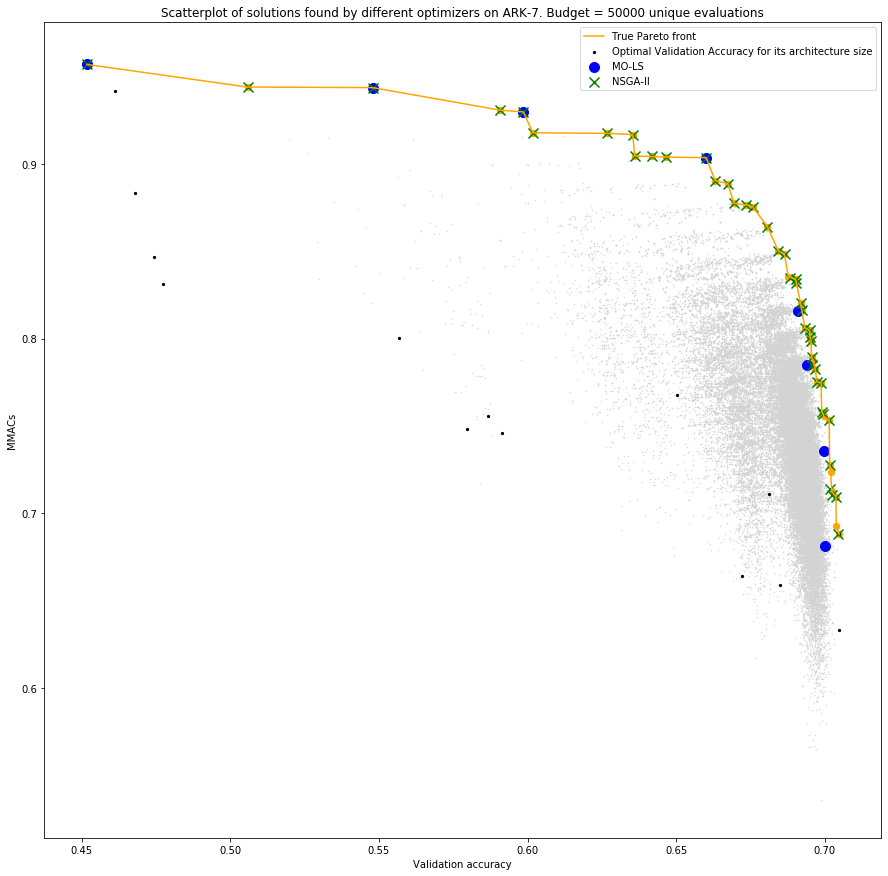

In [159]:
ark7scatter(50000)

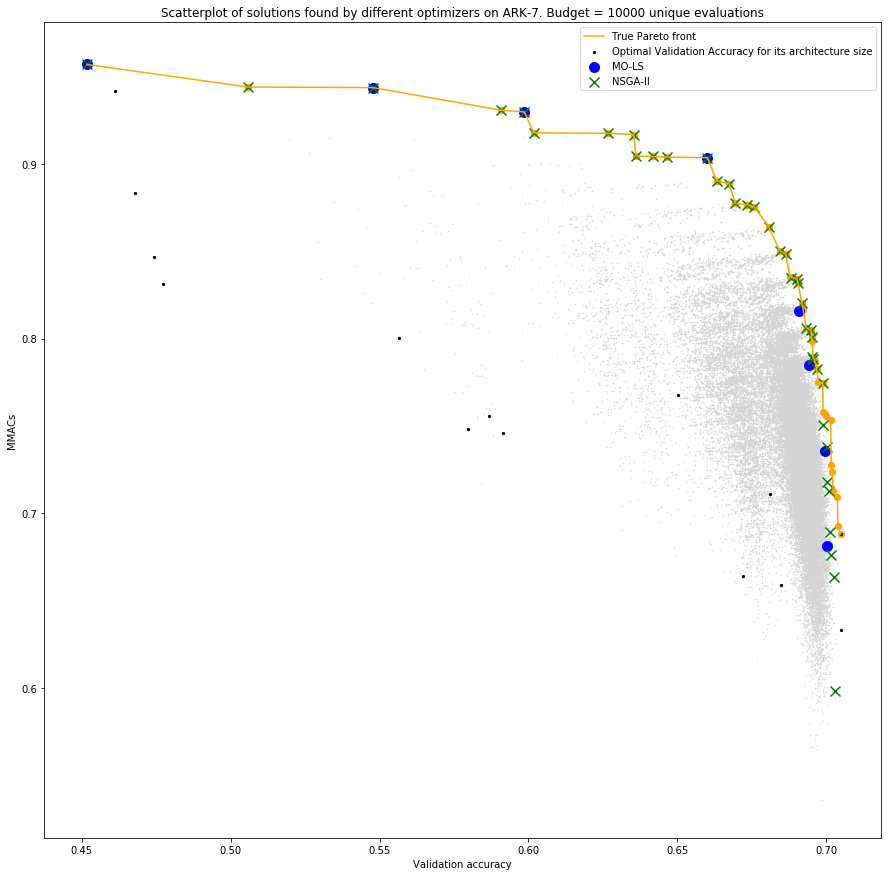

In [156]:
ark7scatter(10000)

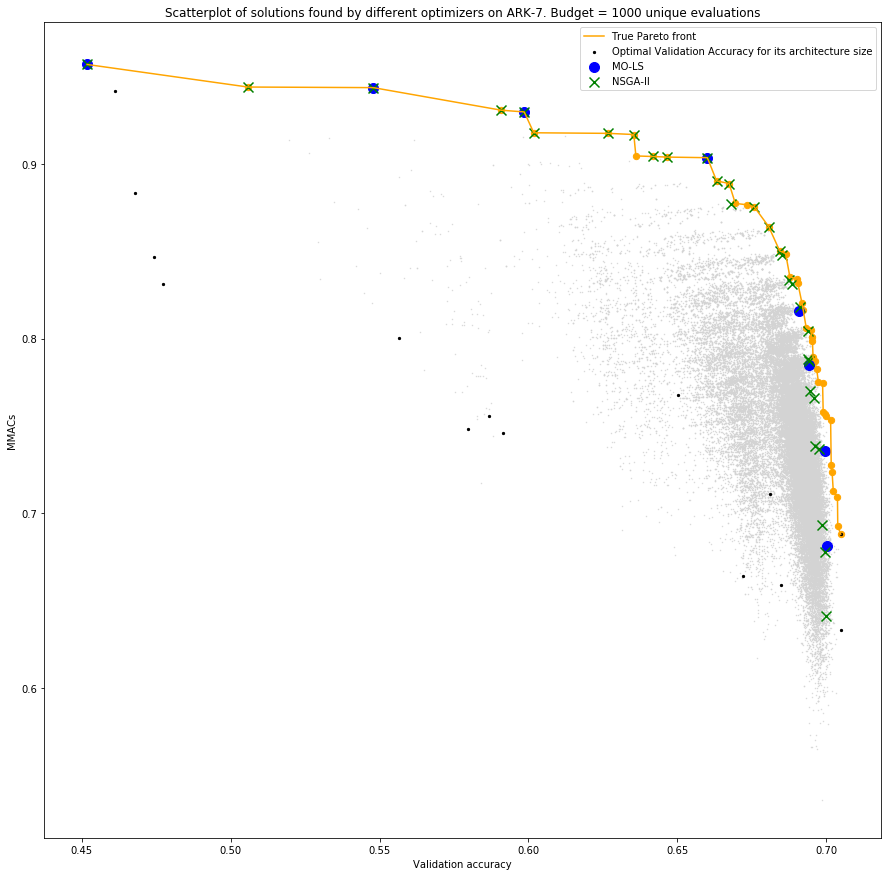

In [157]:
ark7scatter(1000)

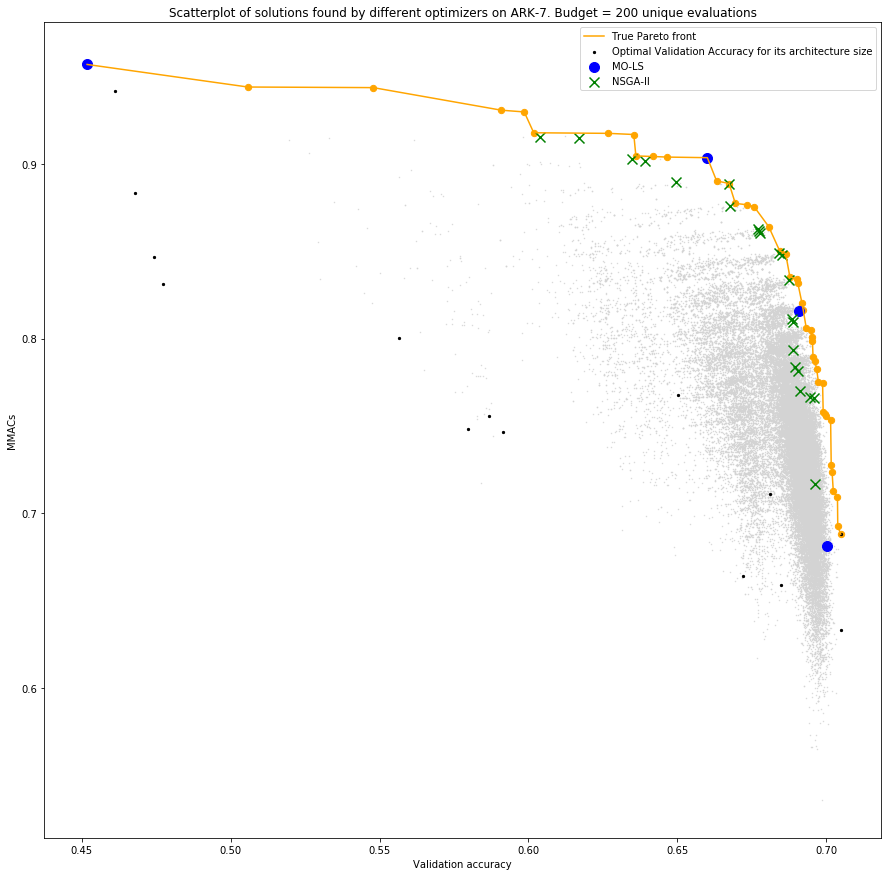

In [158]:
ark7scatter(200)

In [11]:
def fillWithChar (string, totalchars, char):
    for i in range(totalchars - len(string)):
        string += char
    return string

def replaceChar (string, target, new):
    newstring = ""
    for i in range(len(string)):
        if string[i] == target:
            newstring += new
        else:
            newstring += string[i]
    return newstring

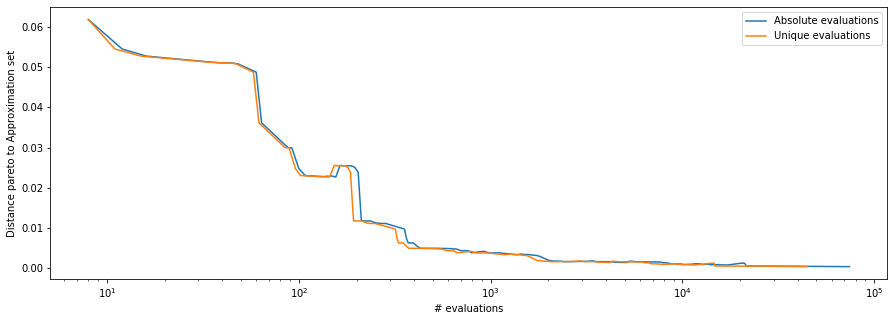

In [186]:
with open("../data/200212_114222_1581504142030_rawdata.json") as json_file:
    data = json.load(json_file)
    paretoDistanceData = data["experiments"]["NSGA-II"]["14"]["0"]["paretoDistance"]
    X1 = paretoDistanceData["totalEvaluations"]
    X2 = paretoDistanceData["totalUniqueEvaluations"]
    Y = paretoDistanceData["distance"]
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(X1, Y, label="Absolute evaluations")
    plt.plot(X2, Y, label="Unique evaluations")
    plt.xlabel("# evaluations")
    plt.ylabel("Distance pareto to Approximation set")
    plt.semilogx()

    plt.legend()